In [ ]:
#Importar bibliotecas
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


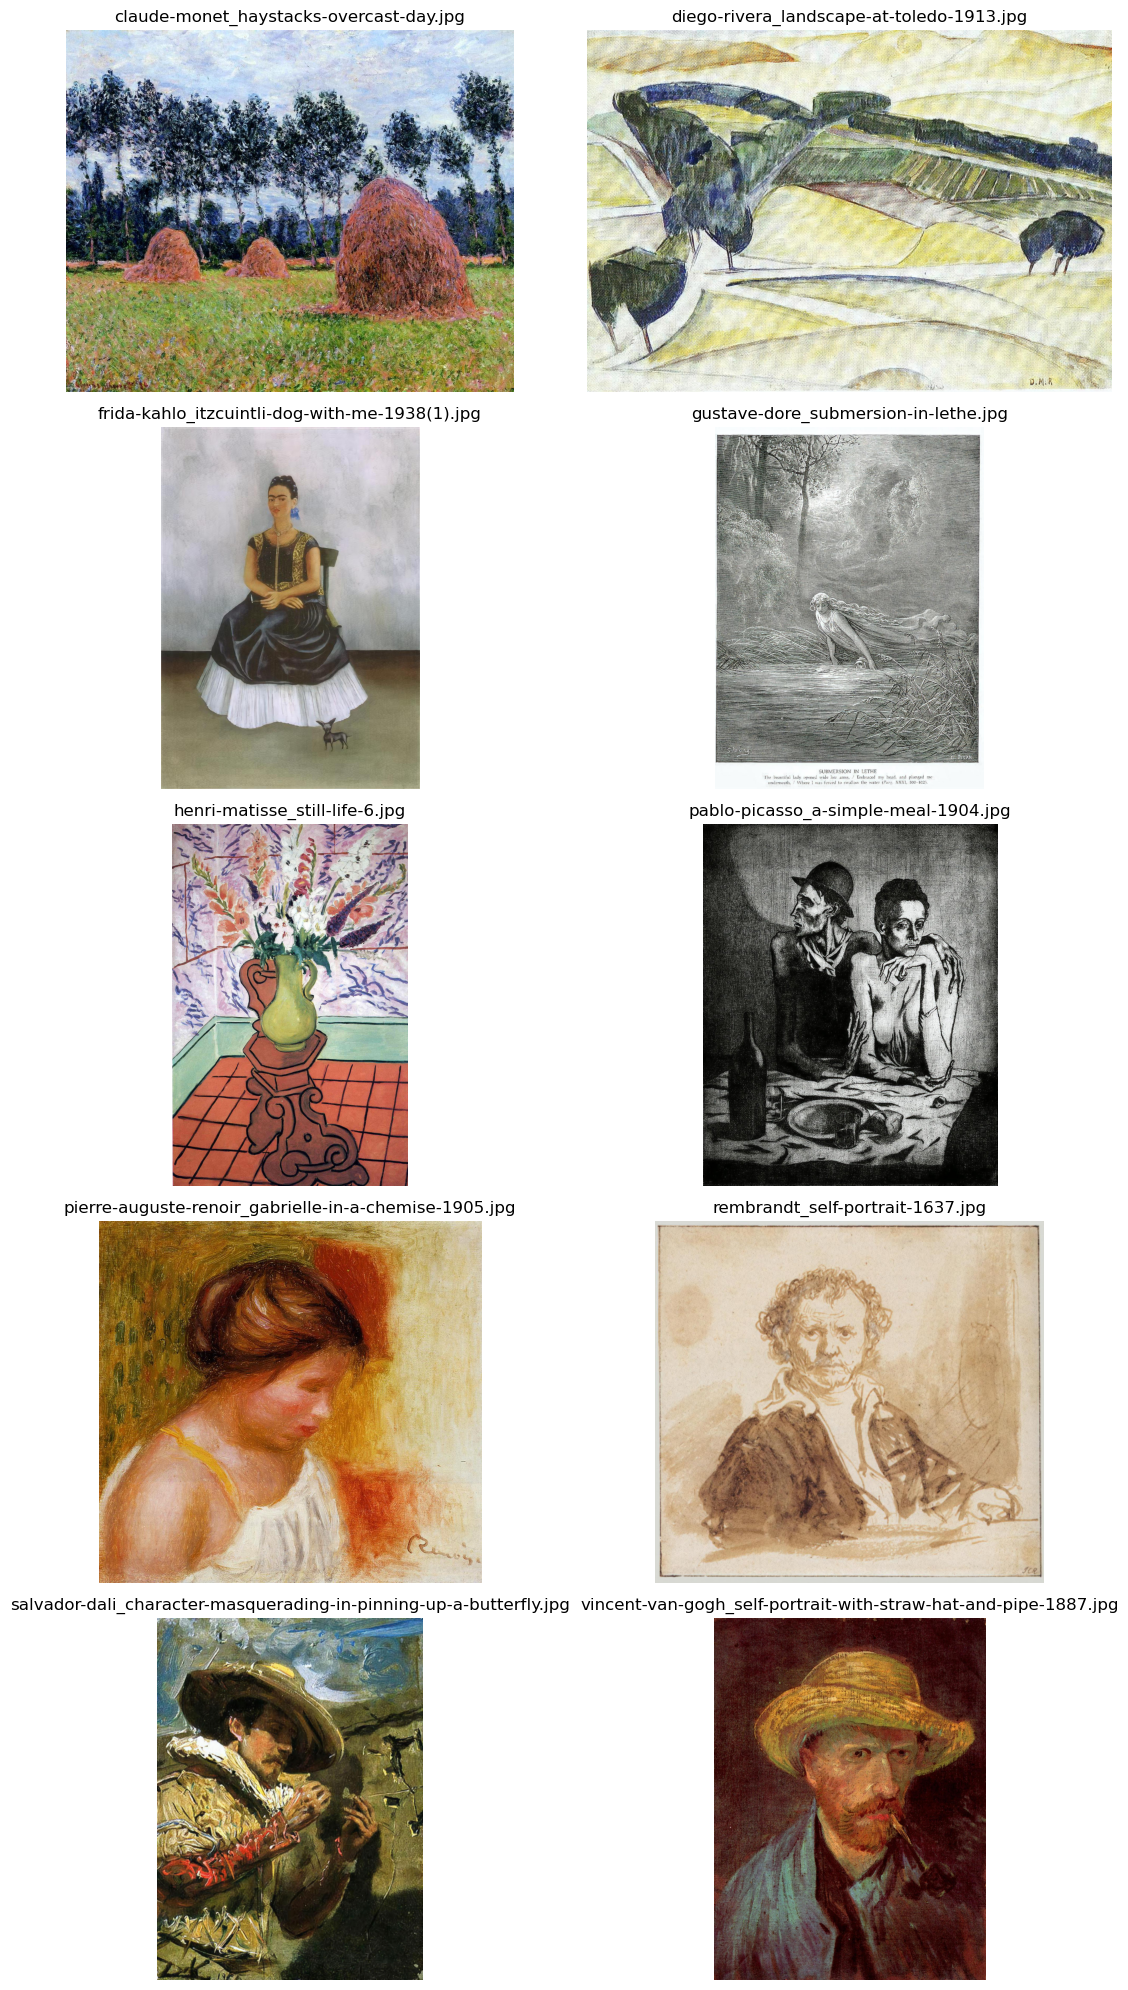

In [41]:
#Cargar y mostrar imagenes
data_folder = "data/images/"
extension = ".jpg"
files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith(extension)]

cols = 2
rows = int(np.ceil(len(files) / cols))
plt.figure(figsize=(12, 4 * rows))
for i, p in enumerate(files, 1):
    img = Image.open(p)
    plt.subplot(rows, cols, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(p))
plt.tight_layout()
plt.show()

In [ ]:
#Función para cargar y redimensionar imagenes
MAX_SIDE = 1024

def load_and_resize_rgb(path: str, max_side: int = MAX_SIDE) -> np.ndarray:
    img = Image.open(path).convert("RGB")
    w, h = img.size
    print(f"Cargando '{path}' -> tamaño original: {w}x{h}")
    scale = min(1.0, max_side / max(w, h))
    print(f"Redimensionando con escala {scale:.3f} -> nuevo tamaño: {int(w*scale)}x{int(h*scale)}")
    if scale < 1.0:
        img = img.resize((int(w*scale), int(h*scale)))
    return np.array(img, dtype=np.uint8)

def to_pixel_matrix(img_uint8: np.ndarray) -> np.ndarray:
    X = img_uint8.reshape(-1, 3)
    return X

prep_pipeline = Pipeline(steps=[
    ("to_pixels", FunctionTransformer(to_pixel_matrix, validate=False)),
], memory="auto", verbose=True)

# Prueba rápida con todas las imágenes
for p in files:
    img = load_and_resize_rgb(p, MAX_SIDE)
    X = prep_pipeline.fit_transform(img)
    print("Imagen:", p, "-> shape:", img.shape, "píxeles:", X.shape)
    print("Rango:", (X.min(), X.max()))


Cargando 'data/images/claude-monet_haystacks-overcast-day.jpg' -> tamaño original: 1711x1382
Redimensionando con escala 0.598 -> nuevo tamaño: 1023x827
[Pipeline] ......... (step 1 of 1) Processing to_pixels, total=   0.0s
Imagen: data/images/claude-monet_haystacks-overcast-day.jpg -> shape: (827, 1023, 3) píxeles: (846021, 3)
Rango: (np.uint8(0), np.uint8(255))
Cargando 'data/images/diego-rivera_landscape-at-toledo-1913.jpg' -> tamaño original: 2005x1382
Redimensionando con escala 0.511 -> nuevo tamaño: 1023x705
[Pipeline] ......... (step 1 of 1) Processing to_pixels, total=   0.0s
Imagen: data/images/diego-rivera_landscape-at-toledo-1913.jpg -> shape: (705, 1023, 3) píxeles: (721215, 3)
Rango: (np.uint8(0), np.uint8(255))
Cargando 'data/images/frida-kahlo_itzcuintli-dog-with-me-1938(1).jpg' -> tamaño original: 1382x1935
Redimensionando con escala 0.529 -> nuevo tamaño: 731x1023
[Pipeline] ......... (step 1 of 1) Processing to_pixels, total=   0.0s
Imagen: data/images/frida-kahlo_itzc